# BT03: Tiền xử lý và chống overfitting

Họ tên: Trần Nhật Huy

MSSV: 1612272

---
## Cách làm bài và nộp bài
&#9889; Bạn lưu ý là mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.


*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>. Bạn có thể thảo luận ý tưởng với bạn khác, nhưng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font>. <font color=red>Nếu vi phạm thì sẽ bị 0 điểm cho toàn bộ môn học.</font>*

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart Kernel & Run All Cells`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart Kernel & Run All Cells` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - Thư mục `BT03`
        - File `BT03-TienXuLy_ChongOverfit.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại và nộp ở link trên moodle. <font color=red>Bạn lưu ý tuân thủ chính xác cấu trúc này.</font>

---
## Mô tả dữ liệu
Bộ dữ liệu được sử dụng là bộ [Kaggle Titanic](https://www.kaggle.com/c/titanic); trong đó, input là thông tin của hành khách trên tàu Titanic, output là một trong hai lớp sống/chết (1/0). Mình có đính kèm các file dữ liệu mà Kaggle cung cấp: `train.csv` - tập huấn luyện, `test.csv` - tập kiểm tra (chỉ có input). Bạn xem ý nghĩa của các cột trong file `description.txt` đính kèm.

---
## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re

In [2]:
import sklearn
sklearn.__version__

'0.21.3'

---
## Đọc tập huấn luyện vào data frame và tách ra tập validation

In [3]:
data_df = pd.read_csv('train.csv', index_col=0)
data_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Backstrom, Mr. Karl Alfred",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# Tách X và y
y_sr = data_df["Survived"] # sr là viết tắt của series
X_df = data_df.drop("Survived", axis=1)

In [7]:
# Tách tập train và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

train_X_df.head().index

Int64Index([232, 837, 640, 390, 598], dtype='int64', name='PassengerId')

&#9889; Mình đã cố định `random_state` trong `train_test_split` để đảm bảo kết quả của mình ra giống với của bạn. Tuy nhiên, mình không biết là với các hệ điều hành khác nhau thì điều này có được đảm bảo không. Kết quả của câu lệnh `train_X_df.head().index` của mình ra 5 giá trị là: `[232, 837, 640, 390, 598]`. Nếu của bạn ra khác thì bạn báo lại trên moodle, vì nếu ra khác thì các kết quả lúc sau của bạn cũng sẽ khác với của mình. 

In [8]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 232 to 81
Data columns (total 10 columns):
Pclass      623 non-null int64
Name        623 non-null object
Sex         623 non-null object
Age         496 non-null float64
SibSp       623 non-null int64
Parch       623 non-null int64
Ticket      623 non-null object
Fare        623 non-null float64
Cabin       143 non-null object
Embarked    621 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 53.5+ KB


In [9]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 422 to 608
Data columns (total 10 columns):
Pclass      268 non-null int64
Name        268 non-null object
Sex         268 non-null object
Age         218 non-null float64
SibSp       268 non-null int64
Parch       268 non-null int64
Ticket      268 non-null object
Fare        268 non-null float64
Cabin       61 non-null object
Embarked    268 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 23.0+ KB


---
## Tiền xử lý tập huấn luyện (3.5đ)

Đầu tiên, ta sẽ thêm và bỏ một số cột như sau: 
- Với cột `Name`, ta sẽ tiến hành rút trích ra cột `Title` tương ứng, gồm các giá trị như `Miss`, `Mrs`, `Mr`, `Master` ..., vì trong tên thì phần này có vẻ là sẽ có ích cho việc dự đoán sống/chết. Tuy nhiên, bạn sẽ thấy `Title` có khá nhiều giá trị khác nhau trong tập huấn luyện (bạn thử thì sẽ thấy có 14 giá trị), trong đó có các giá trị chỉ xuất hiện một hoặc một ít lần; nếu ta để nguyên thì khi chuyển sang dạng số bằng phương pháp one-hot sẽ có nhiều cột &#8594; dễ bị overfit. Ta sẽ xử lý vấn đề này như sau: chỉ lấy `num_top_titles` (ví dụ, 4) giá trị xuất hiện nhiều nhất, các giá trị còn lại sẽ được thay thế bằng giá trị `Others`. Lúc sau, ta sẽ thí nghiệm để chọn ra giá trị `num_top_titles` phù hợp. Sau khi xử lý cột `Title` như vừa nói, ta thêm cột này vào dataframe và bỏ cột `Name` đi.
- Bỏ cột `Cabin` vì cột này có quá nhiều giá thiếu.
- Bỏ cột `Ticket` vì cột này có rất nhiều giá trị khác nhau, nếu chuyển sang dạng số bằng phương pháp one-hot thì sẽ làm tăng số lượng cột lên rất nhiều.

Class `ColAdderDropper` ở dưới đây sẽ thực hiện các bước ở trên. Vì trong các bước ở trên, có bước ta cần tính toán các giá trị từ tập huấn luyện (`num_top_titles` giá trị của cột `Title` mà xuất hiện nhiều nhất) và dùng các giá trị này để "transform" tập dữ liệu (có thể là tập huấn luyện, có thể là tập validation hoặc tập kiểm tra) nên ta phải tự định nghĩa một class theo dạng "transformer" của Sklearn (để lúc sau có thể dùng pipeline của Sklearn) và trong đó ta phải tự định nghĩa phương thức `fit` và `transform` (còn nếu chỉ cần "transform" tập dữ liệu mà không cần tính toán giá trị gì từ tập huấn luyện thì dùng `FunctionTransformer` như trong file "10-Demo.ipynb" sẽ tiện lợi hơn). Bạn lưu ý: phương thức `fit` chỉ được dùng trên tập huấn luyện, còn phương thức `transform` (sau khi đã `fit`) có thể được dùng cho bất kỳ tập nào. Ở dưới, mình đã viết cho bạn phương thức `fit`; sau khi `fit`, các giá trị của cột `Title` cùng với số lần xuất hiện sẽ được lưu vào thuộc tính `self.title_counts_` (khi "transform" thì không cần dùng đến thông tin này, nhưng có thể bạn sẽ muốn xem thông in này), và `num_top_titles` giá trị xuất hiện nhiều nhất sẽ được lưu vào `self.top_titles_` (`num_top_titles` là siêu tham số mà phải chỉ định khi tạo ra một đối tượng thuộc class này). Nhiệm vụ của bạn là hoàn thành phương thức `transform` (trong đó, sẽ cần dùng đến `self.top_titles_`); bạn lưu ý không làm thay đổi dữ liệu ở `X_df` truyền vào.

Ngoài ra, như bạn có thể thấy ở bên dưới, class `ColAdderDropper` được kế thừa từ 2 class của Sklearn là `BaseEstimator` và `TransformerMixin`. Việc kế thừa này giúp class của ta tự động có các phương thức như `set_params`, `get_params`, `fit_transform` (nếu không thì ta sẽ phải tự định nghĩa các phương thức này). Nếu muốn tìm hiểu thêm về cách viết class theo dạng của Sklearn, bạn có thể đọc [ở đây](https://scikit-learn.org/stable/developers/develop.html?highlight=baseestimator).

In [10]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        title_col = X_df.Name.str.extract(r'([a-zA-z]+)\.', expand=False)
        self.title_counts_ = title_col.value_counts()
        titles = list(self.title_counts_.index)
        self.top_titles_ = titles[:max(1, min(self.num_top_titles, len(titles)))]
        return self
    def transform(self, X_df, y=None):
        # YOUR CODE HERE
        #raise NotImplementedError()
        tp = X_df.copy()
        name_array = tp.Name.values
        name_array = name_array.tolist()
        N = len(name_array)
        for i in range(N):
            res = re.findall(r'([a-zA-z]+)\.', name_array[i])[0]
            if res in self.top_titles_:
                name_array[i] = res
            else:
                name_array[i] = 'Others'
        tp.drop(labels=['Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
        tp['Title'] = pd.Series(name_array, index=tp.index)
        return tp

In [11]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_titles=4)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.title_counts_)
print()
print(col_adderdropper.top_titles_)

Mr          357
Miss        125
Mrs          89
Master       32
Dr            7
Rev           5
Capt          1
Ms            1
Countess      1
Jonkheer      1
Don           1
Mme           1
Mlle          1
Col           1
Name: Name, dtype: int64

['Mr', 'Miss', 'Mrs', 'Master']


In [12]:
# TEST TRANSFORM METHOD
fewer_cols_train_X_df = col_adderdropper.transform(train_X_df)
assert set(fewer_cols_train_X_df.columns) == {'Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Title'}
assert np.all(fewer_cols_train_X_df['Title'].value_counts() == \
              pd.Series([357, 125, 89, 32, 20], ['Mr', 'Miss', 'Mrs', 'Master', 'Others']))
fewer_cols_train_X_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
232,3,male,29.0,0,0,7.7750,S,Mr
837,3,male,21.0,0,0,8.6625,S,Mr
640,3,male,NaN,1,0,16.1000,S,Mr
390,2,female,17.0,0,0,12.0000,C,Miss
598,3,male,49.0,0,0,0.0000,S,Mr


Đến đây, các cột dạng số (numerical) gồm:`Pclass`, `Age`, `SibSp`, `Parch`, `Fare`; các cột dạng chuỗi có giá trị rời rạc không thứ tự (categorical) gồm: `Sex`, `Embarked`, `Title`. Các bước tiền xử lý tiếp theo như sau:
- Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột <font color=blue>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột dạng số trong tập huấn luyện, ta đều cần tính mean, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới. 
- Với các cột dạng chuỗi có giá trị rời rạc không thứ tự:
    - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột <font color=blue>(gợi ý: dùng `SimpleImputer` trong Sklearn)</font>. Với *tất cả* các cột dạng chuỗi có giá trị rời rạc không thứ tự trong tập huấn luyện, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot <font color=blue>(gợi ý: dùng `OneHotEncoder` trong Sklearn, để ý tham số `handle_unknown` vì khi dự đoán với các véc-tơ input mới ...)</font>.
- Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa bằng cách trừ đi mean và chia cho độ lệch chuẩn của cột để giúp cho các thuật toán cực tiểu hóa như Gradient Descent, LBFGS, ... hội tụ nhanh hơn <font color=blue>(gợi ý: dùng `StandardScaler` trong Sklearn)</font>.

Nhiệm vụ của bạn là tạo ra một pipeline, đặt tên là `preprocess_pipeline`, bao gồm: bước thêm cột `Title` và bỏ các cột (đã cài ở class `ColAdderDropper`, bạn để `num_top_titles=4`), và tất cả các bước ở đây. Sau khi tạo ra được pipeline này rồi, bạn sẽ gọi phương thức `fit_transform` với đầu vào là `train_X_df` để tính các giá trị từ tập huấn luyện (ví dụ, `top_titles_` ở bước thêm và xóa cột, mean và mode ở bước xử lý giá trị thiếu, mean và độ lệch chuẩn ở bước chuẩn hóa) và đồng thời tiền xử lý `train_X_df`; kết quả trả về sẽ là `train_X_df` sau khi đã tiền xử lý, là một mảng Numpy, bạn đặt tên là `preprocessed_train_X`. <font color=blue>(Gợi ý: bạn đọc cách sử dụng pipeline ở [document](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression), có thể bỏ qua mục 6.1.2; bạn sẽ cần dùng `Pipeline`/`make_pipeline` và `ColumnTransformer`/`make_column_transformer`.)</font>

In [13]:
nume_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cate_cols = ['Sex', 'Embarked', 'Title']
# YOUR CODE HERE
#raise NotImplementedError()
nume = Pipeline(
    steps=[
        ("nume_imp", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("nume_scl", StandardScaler())
    ]
)
cate = Pipeline(
    steps=[
        ("cate_imp", SimpleImputer(strategy="most_frequent")),
        ("cate_enc", OneHotEncoder(handle_unknown="ignore", sparse=False)),
        ("cate_scl", StandardScaler())
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', nume, nume_cols),
        ('cat', cate, cate_cols)
    ]
)
preprocess_pipeline = Pipeline(
    steps=[
        ('add', ColAdderDropper(num_top_titles=4)),
        ("preprocessing", preprocessor)
    ]
)
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

In [14]:
# TEST
assert preprocessed_train_X.shape == (623, 15)
row0 = {-0.736, -0.501, -0.481, -0.48, -0.479, -0.478, -0.408, -0.295, -0.233, -0.182, -0.041, 0.603, 0.736, 0.844, 0.863}
row1 = {-0.736, -0.664, -0.501, -0.481, -0.48, -0.478, -0.463, -0.408, -0.295, -0.233, -0.182, 0.603, 0.736, 0.844, 0.863}
assert set(np.round(preprocessed_train_X[0], decimals=3)) == row0
assert set(np.round(preprocessed_train_X[1], decimals=3)) == row1

## Tiền xử lý tập validation (1.5đ)

Một khi đã có `preprocess_pipeline` với các giá trị (`top_titles_`, mean, mode, ...) đã được tính từ tập huấn luyện, ta có thể dễ dàng dùng phương thức `transform` để tiền xử lý cho các véc-tơ input mới trong tập validation và tập test. Dưới đây, bạn sẽ làm như vậy để tiền xử lý cho `val_X_df` và lưu kết quả vào `preprocessed_val_X`.

In [15]:
# YOUR CODE HERE
#raise NotImplementedError()
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

In [16]:
# Test
assert preprocessed_val_X.shape == (268, 15)
row0 = {-1.659, -0.736, -0.664, -0.501, -0.481, -0.48, -0.478, -0.408, -0.233, -0.182, 0.736, 0.844, 0.863, 3.385}
row1 = {-1.988, -1.358, -1.158, -0.478, -0.408, -0.346, -0.295, -0.233, -0.182, 0.098, 0.603, 0.831, 1.358, 1.38, 1.996}
assert set(np.round(preprocessed_val_X[0], 3)) == row0
assert set(np.round(preprocessed_val_X[1], 3)) == row1

Giải thích tại sao không nên làm 2 cách sau:
- Tiền xử lý tập validation bằng các giá trị  (top_titles_, mean, mode, ...) được tính từ tập validation
- Hoặc tiền xử lý tất cả dữ liệu rồi mới tách tập validation

YOUR ANSWER HERE  
Ta không làm theo cách 1 được là vì ta muốn tập validation sẽ gần giống với dữ liệu ngoài thực tế. Ở thực tế, chúng ta không thể nào có dữ liệu để mà tính toán (toptitles, mean, mode, ...)  
Ta cũng không thể làm theo cách 2 vì ta không muốn tập validation tham gia vào quá trình học ra các tham số, do ta muốn tập validation có thể mô phỏng dữ liệu giống trong thực tế nhất có thể.  

---
## Tạo một pipeline từ đầu đến cuối và chọn lựa mô hình tốt nhất (4đ)
Ta sẽ sử dụng mô hình Neural Net để phân lớp. Bạn sẽ tạo ra một pipeline từ đầu đến cuối bao gồm: các bước tiền xử lý ở trên + Neural Net (với các siêu tham số `hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=500`). Bạn đặt tên cho pipeline này là `full_pipeline`. Việc tạo ra một pipeline từ đầu đến cuối như này có các lợi ích sau:
- Giúp đơn giản hóa: 
    - Để huấn luyện từ đầu tới cuối, chỉ cần gọi phương thức `fit` của pipeline này trên tập huấn luyện dạng thô. Lúc này, các "transformer" ở các bước tiền xử lý sẽ gọi `fit_transform`, còn "classifier" ở cuối sẽ gọi `fit`.
    - Với các véc-tơ input ở dạng thô, để dự đoán thì chỉ cần gọi phương thức `predict` của pipeline. Lúc này, các "transformer" ở các bước tiền xử lý sẽ gọi `transform`, còn "classifier" ở cuối sẽ gọi `predict`.
- Giúp tránh tiền xử lý tập validation/kiểm-tra sai cách (như đã nói ở mục "Tiền xử lý tập validation" ở trên). Đố bạn làm sai được đấy ;-).
- Giúp dễ dàng thử nghiệm đồng thời các giá trị của các siêu tham số ở các bước trong pipeline (sẽ làm ở ngay dưới).

Sau khi đã có được pipeline từ đầu đến cuối này, bạn sẽ thử nghiệm:
- Siêu tham số `alpha` (mức độ L2 regularization) của `MLPClassifier` với 5 giá trị khác nhau: 0.1, 1, 10, 100, 1000.
- Siêu tham số `num_top_titles` của `ColAdderDropper` (ở bước tiền xử lý) với 6 giá trị khác nhau: 1, 3, 5, 7, 9, 11.

Để gán lại giá trị `alpha` và `num_top_titles` cho `full_pipeline`, bạn sẽ dùng phương thức `set_params`: 

`full_pipeline.set_params(coladderdropper__num_top_titles=..., mlpclassifier__alpha=...)`

Trong câu lệnh ở trên, `coladderdropper` và `mlpclassifier` là tên của 2 bước trong `full_pipeline` (2 bước nào thì chắc bạn cũng đoán được). Nếu bạn tạo pipeline bằng `make_pipeline` thì tên của các bước sẽ được tự động lấy là tên của các class và được viết thường như 2 tên ở trên. Còn nếu bạn dùng `Pipeline` và tự đặt tên cho các bước thì bạn dùng tên của bạn trong phương thức `set_params`.  

Như vậy, tổng cộng bạn sẽ thử nghiệm $5\times6 = 30$ mô hình khác nhau, với mỗi mô hình bạn sẽ: huấn luyện trên tập huấn luyện, tính độ lỗi trên tập huấn luyện và tập validation rồi `append` độ lỗi vào 2 list tương ứng là `train_errs` và `var_errs` (để dễ nhìn, bạn tính độ lỗi theo đơn vị %, nghĩa là có giá trị từ 0-100 chứ không phải từ 0-1). Bạn lưu lại độ lỗi nhỏ nhất trên tập validation và giá trị `alpha` và `num_top_titles` tương ứng lần lượt vào biến `best_val_err`, `best_alpha`, `best_num_top_titles`.

In [17]:
# Tạo full pipeline
nume_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cate_cols = ['Sex', 'Embarked', 'Title']
# YOUR CODE HERE
#raise NotImplementedError()
full_pipeline = Pipeline(
    steps = [
        ('coladderdropper', ColAdderDropper()),
        ("preprocessing", preprocessor),
        ("mlpclassifier", MLPClassifier(hidden_layer_sizes=(20), activation='tanh', solver='lbfgs', random_state=0, max_iter=500))
    ]
)
# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100, 1000]
num_top_titles_s = [1, 3, 5, 7, 9, 11]
best_val_err = float('inf'); best_alpha = None; best_num_top_titles = None
for alpha in alphas:
    for num_top_titles in num_top_titles_s:
        # YOUR CODE HERE
        #raise NotImplementedError()
        full_pipeline.set_params(coladderdropper__num_top_titles=num_top_titles, mlpclassifier__alpha=alpha)
        model = full_pipeline.fit(train_X_df, train_y_sr)
        train_errs.append(np.mean(train_y_sr != model.predict(train_X_df)) * 100)
        val_err = np.mean(val_y_sr != model.predict(val_X_df)) * 100
        val_errs.append(val_err)
        if val_err < best_val_err:
            best_val_err = val_err
            best_alpha = alpha
            best_num_top_titles = num_top_titles
'Finish!'

'Finish!'

In [18]:
# TEST
assert round(best_val_err, 3) == 16.045
assert best_alpha == 10
assert best_num_top_titles == 3

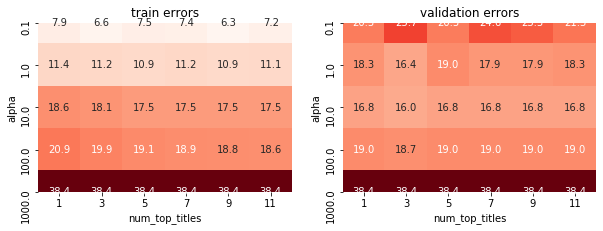

In [19]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=num_top_titles_s)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=num_top_titles_s)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); plt.xlabel('num_top_titles'); plt.ylabel('alpha');

Nhận xét về ảnh hưởng của siêu tham số `alpha` (có sao thì bạn nói vậy, chỗ nào không biết thì nói là không biết): 
- Bạn kỳ vọng khi `alpha` thay đổi thì độ lỗi trên tập huấn luyện và tập validation sẽ thay đổi như thế nào? Tại sao bạn lại kỳ vọng như vậy?
- Kết quả ở trên có giống như kỳ vọng của bạn không? Nếu không thì bạn nghĩ xem tại sao lại như vậy?

YOUR ANSWER HERE  
Khi alpha tăng thì em mong muốn rằng:
* Độ lỗi trên tập huấn luyện sẽ tăng vì alpha là một siêu tham số kìm hãm quá trình học để không học các dữ liệu nhiễu
* Độ lỗi trên tập validation sẽ giảm sau đó sẽ tăng vì khi ta tăng alpha thì ta sẽ không fit vào dữ liệu nhiễu nên độ lỗi trên tập validation sẽ giảm, tuy nhiên tới một thời điểm alpha quá lớn thì ta sẽ bị underfitting do đó độ lỗi trên tập validation lại tăng

Kết quả:
* Đối với tập huấn luyện thì kết quả như em dự đoán
* Đối với tập validation thì kết quả cũng như em kỳ vọng

Nhận xét về ảnh hưởng của siêu tham số `num_top_titles` (có sao thì bạn nói vậy, chỗ nào không biết thì nói là không biết): 
- Bạn kỳ vọng khi `num_top_titles` thay đổi thì độ lỗi trên tập huấn luyện và tập validation sẽ thay đổi như thế nào? Tại sao bạn lại kỳ vọng như vậy?
- Kết quả ở trên có giống như kỳ vọng của bạn không? Nếu không thì bạn nghĩ xem tại sao lại như vậy?

YOUR ANSWER HERE  
Khi num_top_titles tăng thì em mong muốn rằng:
* Độ lỗi trên tập huấn luyện sẽ giảm vì dữ liệu sẽ có nhiều cột hơn do đó ta đang overfitting vào dữ liệu
* Độ lỗi trên tập validation sẽ tăng vì ta đã overfitting vào tập train

Kết quả ở trên không giống như em kỳ vong. Em vẫn chưa hiểu tại sao

Cuối cùng, bạn sẽ huấn luyện lại `full_pipeline` trên `X_df` và `y_sr` (tập huấn luyện + tập validation) với `best_alpha` và `best_num_top_titles` tìm được ở trên để ra được mô hình cụ thể cuối cùng.

In [20]:
# YOUR CODE HERE
#raise NotImplementedError()
full_pipeline.set_params(coladderdropper__num_top_titles=3, mlpclassifier__alpha=10)
final_model = full_pipeline.fit(X_df, y_sr)

---
## Đi thi (1đ)
Bạn sẽ dùng mô hình cụ thể cuối cùng ở trên để dự đoán với các input trong tập test (file "test.csv") và submit kết quả dự đoán lên Kaggle. Để có thể submit thì bạn phải tạo ra file csv có 2 cột: cột thứ nhất là id của các hành khách trong tập test, cột thứ hai là giá trị dự đoán của bạn (1 - sống, và 0 - chết). Bạn có thể xem file mẫu `submission.csv` mà mình đính kèm. Bạn đặt tên file của bạn là `my_preds.csv`.

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
test_df = pd.read_csv('test.csv', index_col=0)
y_pred = final_model.predict(test_df)
y_pred_sr = pd.Series(y_pred, index=test_df.index)
y_pred_sr.to_csv("my_preds.csv", index=True, header=["Survived"])

In [22]:
# TEST
my_preds_df = pd.read_csv('my_preds.csv', index_col=0)
assert round(my_preds_df['Survived'].mean(), 3) == 0.361
assert np.all(my_preds_df.iloc[:5].values.reshape(-1) == np.array([0, 0, 0, 0, 1]))

Kế đến, bạn sẽ submit file csv chứa kết quả dự đoán lên [Kaggle](https://www.kaggle.com/c/titanic) (bạn sẽ cần tạo một account trên Kaggle), và ghi nhận lại độ lỗi trên tập test ở cell phía dưới.

YOUR ANSWER HERE  
0.78947